PHYS 514 -- Final Project -- Tevfik Can Yüce, 64065

Einstein Part

In [1]:
import numpy as np
import einstein_functions
import matplotlib.pyplot as plt
import scipy.constants as constants

Part (a):

d:\ELEC COURSES\PHYS514\Final Project\einstein_functions.py:24: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(y[2]/K_NS)


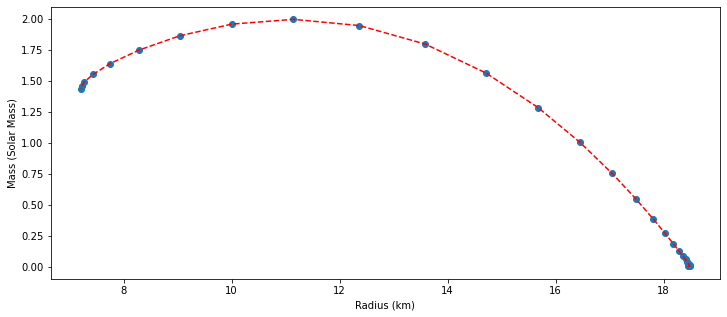

In [6]:
#This cell solves TOV equation for different central pressures and obtains an M-R curve
#Constants
K_NS = 100
N_samples = 30

#Central density and pressure values
rho_c_vals = np.logspace(-6,-1, N_samples)
p_c_vals = K_NS * np.power(rho_c_vals, 2)

#Solve TOV equation for different central pressure values
R_vals = []
M_vals = []
for p_c in p_c_vals:
    R, M = einstein_functions.solve_TOV(p_c=p_c)
    R_vals.append(R)
    M_vals.append(M)

R_vals = np.asarray(R_vals).astype(float)
M_vals = np.asarray(M_vals).astype(float)

#Plot the result
plt.figure(figsize=(12,5))
plt.scatter(x=R_vals*1.477, y=M_vals)
plt.plot(R_vals*1.477, M_vals, '--', color='red')
plt.xlabel('Radius (km)')
plt.ylabel('Mass (Solar Mass)')
plt.show()

Part (b):

d:\ELEC COURSES\PHYS514\Final Project\einstein_functions.py:57: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(y[2]/K_NS)


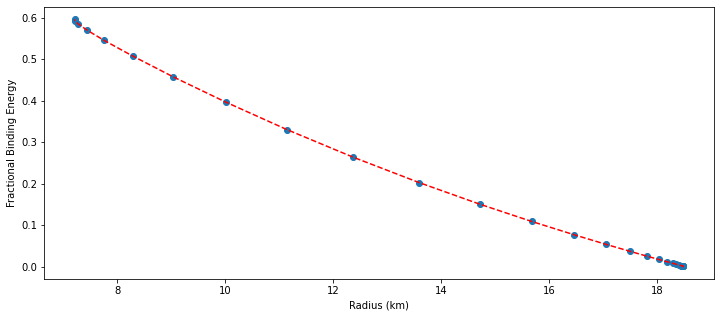

In [4]:
#This cell solves TOV equation with baryonic mass for different central pressures and obtains an M-R curve
#Constants
K_NS = 100
N_samples = 50

#Central density and pressure values
rho_c_vals = np.linspace(np.power(10, -6),np.power(10, -1), N_samples)
p_c_vals = K_NS * np.power(rho_c_vals, 2)

#Solve TOV equation for different central pressure values
R_vals = []
M_vals = []
M_p_vals = []
for p_c in p_c_vals:
    R, M, M_p = einstein_functions.solve_TOV_mp(p_c=p_c)
    R_vals.append(R)
    M_vals.append(M)
    M_p_vals.append(M_p)

R_vals = np.asarray(R_vals).astype(float)
M_vals = np.asarray(M_vals).astype(float)
M_p_vals = np.asarray(M_p_vals).astype(float)

#Calculate fractional bind energy
delta_vals = (M_p_vals - M_vals)/M_vals

#Plot the result
plt.figure(figsize=(12,5))
plt.scatter(x=R_vals*1.477, y=delta_vals)
plt.plot(R_vals*1.477, delta_vals, '--', color='red')
plt.xlabel('Radius (km)')
plt.ylabel('Fractional Binding Energy')
plt.show()